In [1]:
import pandas as pd
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
wine = load_wine(as_frame=True)

In [3]:
X = wine.data

In [4]:
column_names = [x for x in X.columns]
column_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Visualization

In [5]:
# Get subplot coordinates function I created for another project. 
# Its changed slightly for each application, in this instance the 12 loops are unique for this 
# project
def gets_subplot_coords(df):
    coords = []
    m=0
    n=0
    for i in range(0,13):
        coords.append([m,n])
        n+=1
        if n in [3,6,9,12]:
            m+=1
            n=0
    return coords

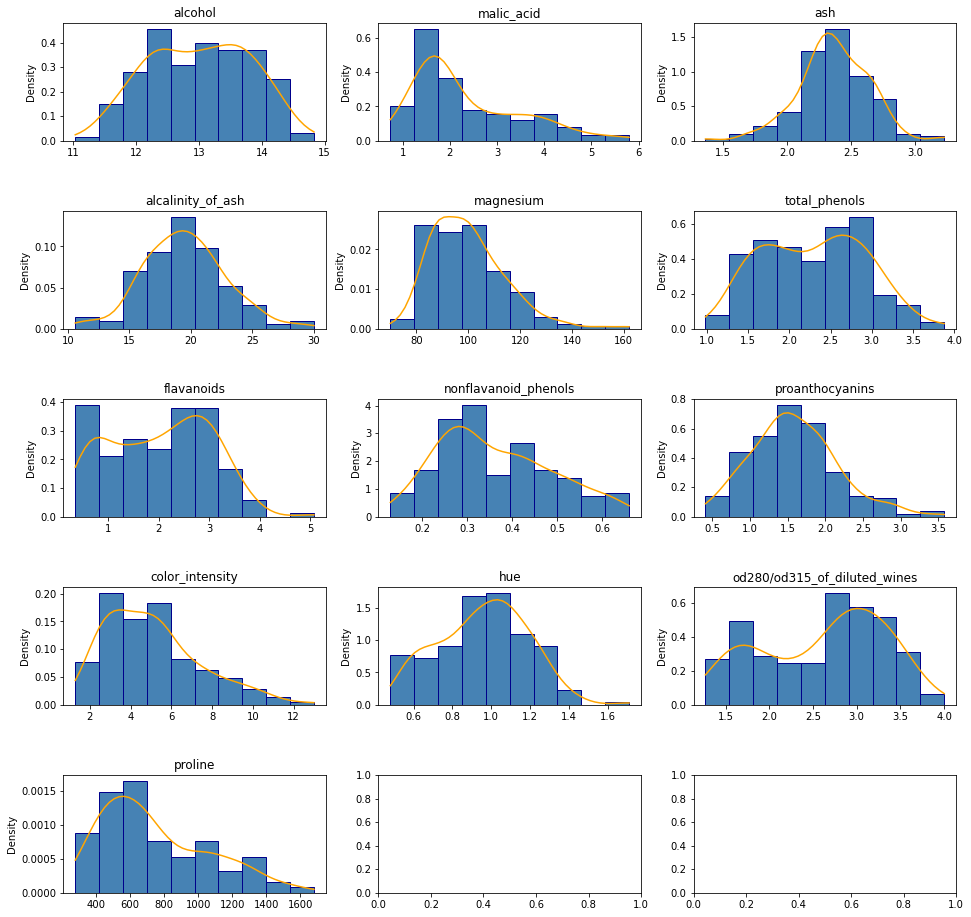

In [6]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (16,16))
ax_coords = gets_subplot_coords(X)
index = 0

for feature in X:

    loc = ax_coords[index]
    # Plot hist for each feature
    axs[loc[0], loc[1]].hist(x = X[feature], bins = 10, density = True, 
                                     color = "steelblue", ec = "darkblue")
    min_ = min( X[feature] )
    max_ = max( X[feature] )
    # Create KDE object, interval
    kde = stats.gaussian_kde(X[feature])
    xx = np.linspace(min_, max_)

    # Fit KDE to hist
    axs[loc[0], loc[1]].plot(xx, kde(xx), color = "orange")

    # Set axis settings
    axs[loc[0], loc[1]].set_title(str(feature))
    axs[loc[0], loc[1]].set_ylabel('Density')
    
    # Adjust spacing for overlap
    fig.subplots_adjust(hspace = 0.6)
    
    index+=1

In [7]:
# Get data of interest for visualizing
df_target_alc = X.copy()
df_target_alc['wine_class'] = wine.target
df_target_alc = df_target_alc.drop(['malic_acid', 
                    'ash', 'alcalinity_of_ash', 
                    'magnesium', 'nonflavanoid_phenols',
                    'proanthocyanins', 'color_intensity',
                    'hue', 'od280/od315_of_diluted_wines', 
                    'proline'], axis = 1)

df_target_0 = df_target_alc.loc[df_target_alc['wine_class'] == 0]
df_target_1 = df_target_alc.loc[df_target_alc['wine_class'] == 1]
df_target_2 = df_target_alc.loc[df_target_alc['wine_class'] == 2]

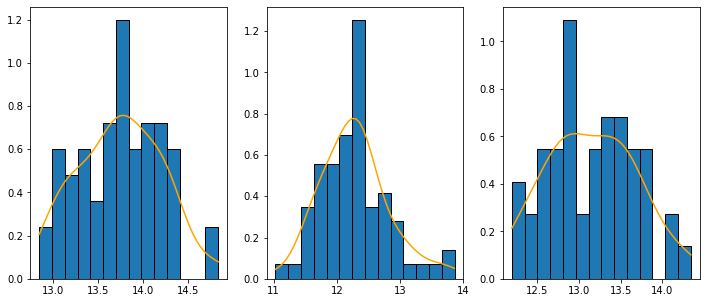

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,5))

group = 0
for df in [df_target_0, df_target_1, df_target_2]:

    axs[group].hist(x = df['alcohol'], density = True, bins = 14, fill = 'blue', edgecolor = 'black')

    min_ = min(df['alcohol'])
    max_ = max(df['alcohol'])

    # Create KDE object, interval
    kde = stats.gaussian_kde(df['alcohol'])
    xx = np.linspace(min_, max_)

    axs[group].plot(xx, kde(xx), color = 'orange')
        
    # Iterate for next class group
    group += 1
    
plt.show()

In [9]:
# Get summary statistics of numerical data
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


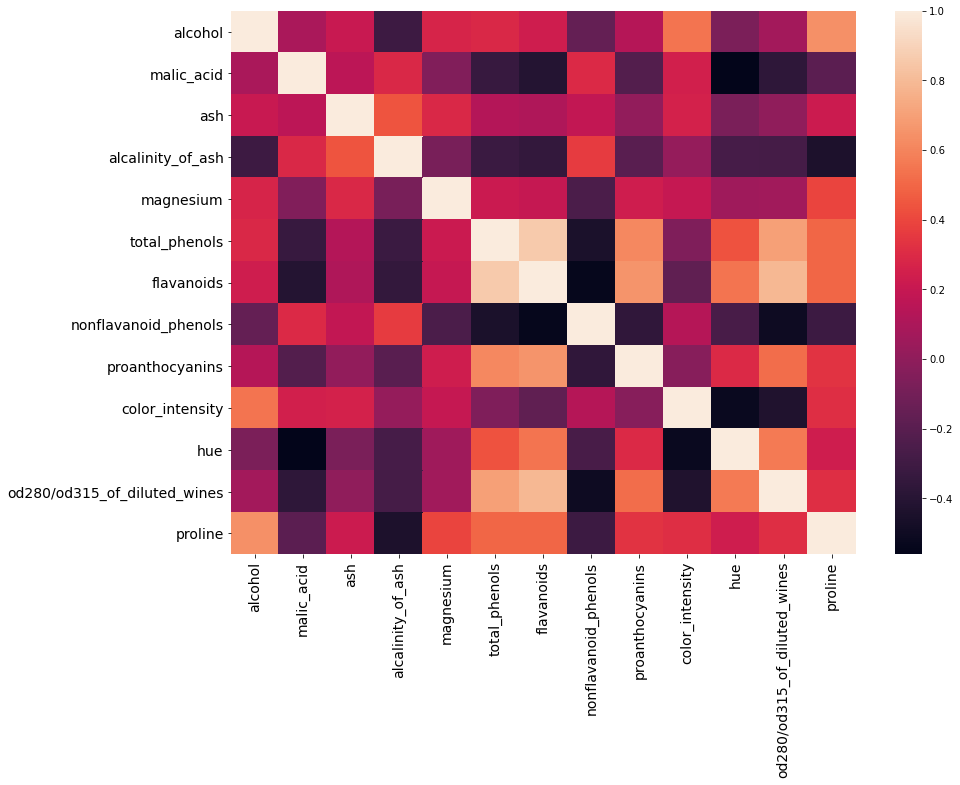

In [10]:
# Visualize heatmap for column pairwise correlation
import seaborn as sns

plt.figure(figsize = (14,10))

df_heatmap = X

sns.heatmap(df_heatmap.corr())
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.show()

In [11]:
# Prepare target data
target = wine.target
target.value_counts()
y = np.ravel(target)
y.shape

(178,)

# Train/ Test split

In [12]:
# Split data for model creation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1224)

## Standardize Data

In [13]:
# Normalize data after split to minimize data leakage
from sklearn.preprocessing import StandardScaler

for split in [X_train, X_test]:
    scaler = StandardScaler()
    scaler.fit_transform(split)

In [14]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
109,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0
27,13.30,1.72,2.14,17.0,94.0,2.40,2.19,0.27,1.35,3.95,1.02,2.77,1285.0
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0


In [15]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

# Model Creation

In [48]:
# Import libraries for performance output
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Support Vector Classification

In [16]:
# Support Vector Classifier to group wine types
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 1224)
classifier.fit(X_train, np.ravel(y_train))

SVCy_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, SVCy_pred))

svc_accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(svc_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(svc_accuracies.std()))

Accuracy: 0.9444444444444444
Cross Validated Accuracy: 91.99 %
Cross Validated Standard Deviation: 0.06


## Decision Tree

In [24]:
# Decision Tree Classifier to break down detailed classifications
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
tree = clf.fit(X_train, y_train)

tree_y_pred = tree.predict(X_test)

tree_accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)

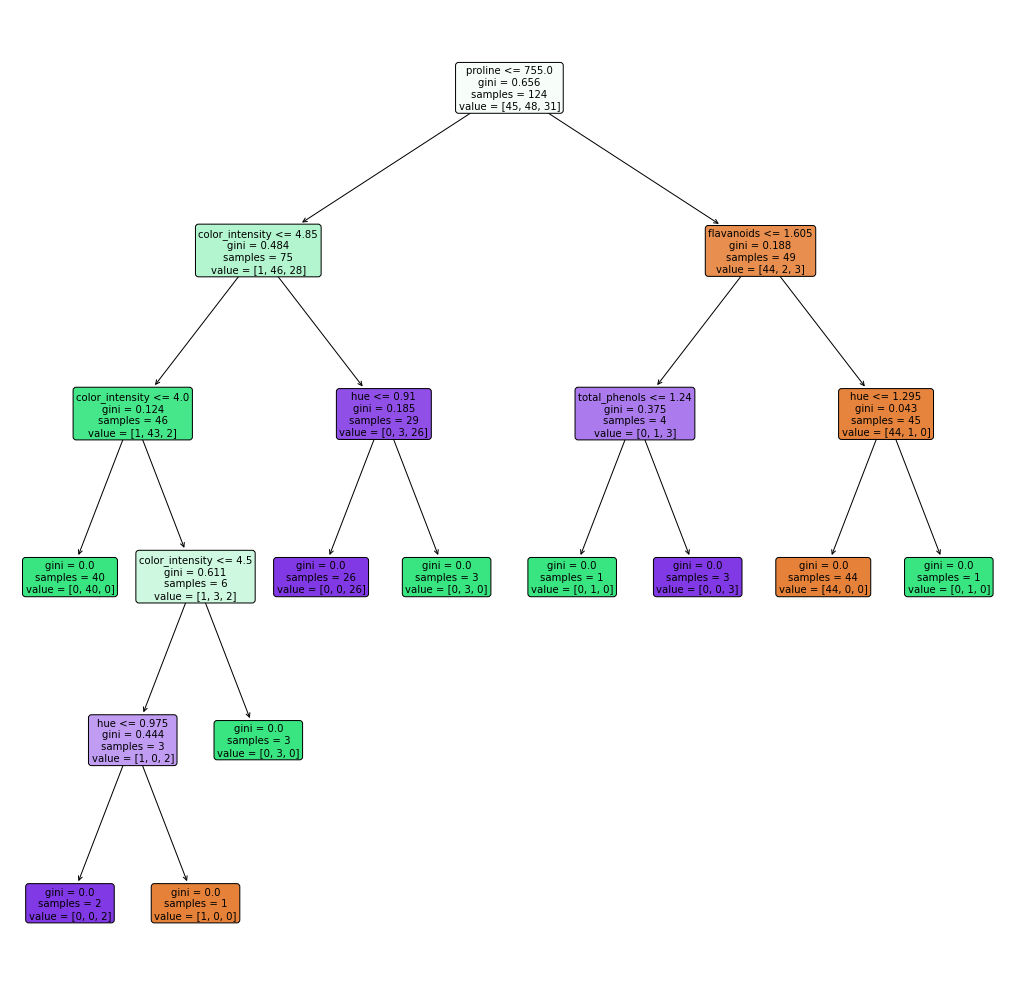

In [30]:
# Visualize Tree Classification
from sklearn import tree

plt.figure(figsize = (18,18))

tree.plot_tree(clf, 
              feature_names = X.columns, 
              filled = True, rounded = True)

plt.show()

In [33]:
# Report accuracy metrics for decision tree
print("Accuracy:", metrics.accuracy_score(y_test, tree_y_pred))

print("Cross Validated Accuracy: {:.2f} %".format(tree_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(tree_accuracies.std()))

Accuracy: 0.8518518518518519
Cross Validated Accuracy: 93.53 %
Cross Validated Standard Deviation: 0.05


In [41]:
# Lets try with max depth 3 to avoid overfitting. Less decisions is simple -- simple is better
clf = DecisionTreeClassifier(max_depth = 3, criterion = 'gini', random_state=0)
tree = clf.fit(X_train, y_train)

tree3_y_pred = tree.predict(X_test)

tree_accuracies = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)

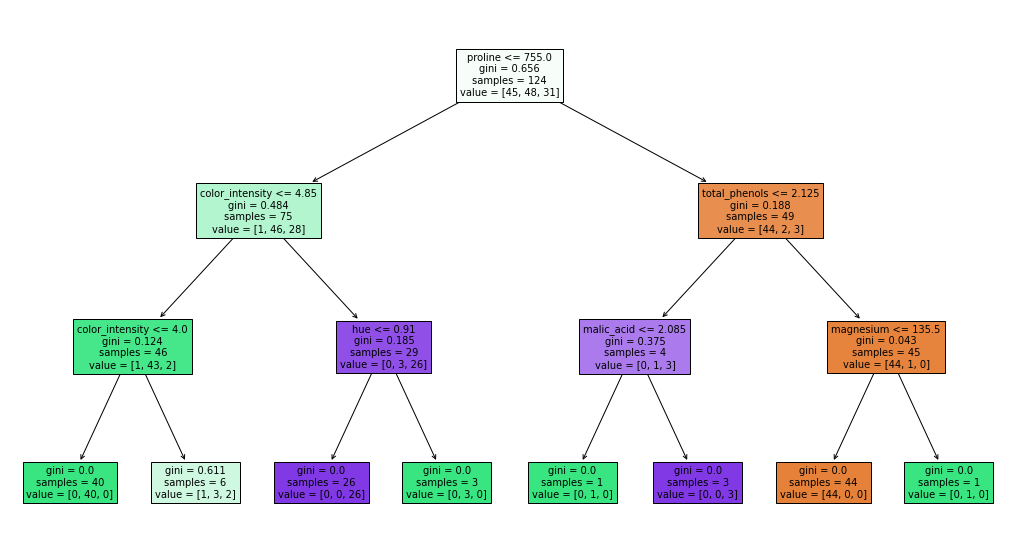

In [49]:
# Visualize depth=3 Tree Classification
from sklearn import tree

plt.figure(figsize = (18,10))

tree.plot_tree(clf, 
              feature_names = X.columns, 
              filled = True)

plt.show()

In [46]:
# Report accuracy metrics for constrained tree
print("Accuracy:", metrics.accuracy_score(y_test, tree_y_pred))

print("Cross Validated Accuracy: {:.2f} %".format(tree_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(tree_accuracies.std()))

Accuracy: 0.8888888888888888
Cross Validated Accuracy: 91.86 %
Cross Validated Standard Deviation: 0.05


### Results
By limiting the depth of the tree and thus the maximum decisions, we can simplify the classification, and increase the accuracy by 3%. Cross-validated, the model performs with about 1.5% lower accuracy. 

However, by limiting the depth we can also be sure to avoid overfitting, which may be evident by the higher cross-validation score. 

### KNN Clustering

In [ ]:
# KNN Clusters to try to cluster the same wine types
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, knn_pred))

knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(knn_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(knn_accuracies.std()))

### Random Forest Classification

In [ ]:
# Random Forest Classifier (More robust decision tree)
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 1224)
forest_class.fit(X_train,y_train)

# Predict Values
forest_pred = forest_class.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, forest_pred))

forest_accuracies = cross_val_score(estimator = forest_class, X = X_train, y = y_train, cv = 10)

print("Cross Validated Accuracy: {:.2f} %".format(forest_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(forest_accuracies.std()))

#### Classification Reports

In [47]:
# Import module
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, SVCy_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.87      0.93        23
           2       1.00      1.00      1.00        17

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.94        54
weighted avg       0.95      0.94      0.95        54



In [44]:
print(classification_report(y_test, tree_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.81      0.96      0.88        23
           2       1.00      0.76      0.87        17

    accuracy                           0.89        54
   macro avg       0.91      0.88      0.89        54
weighted avg       0.90      0.89      0.89        54



In [45]:
print(classification_report(y_test, tree3_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.81      0.96      0.88        23
           2       1.00      0.76      0.87        17

    accuracy                           0.89        54
   macro avg       0.91      0.88      0.89        54
weighted avg       0.90      0.89      0.89        54



In [39]:
print(classification_report(y_test,forest_pred))

NameError: name 'forest_pred' is not defined

### Conclusions

In [ ]:
print('SVC\n')
print("Accuracy:", metrics.accuracy_score(y_test, SVCy_pred))
print("Cross Validated Accuracy: {:.2f} %".format(svc_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(svc_accuracies.std()))
print('\n')

print('Decision Tree\n')
print("Accuracy:", metrics.accuracy_score(y_test, tree_y_pred))
print("Cross Validated Accuracy: {:.2f} %".format(tree_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(tree_accuracies.std()))
print('\n')

print('KNN Clustering\n')
print("Accuracy:", metrics.accuracy_score(y_test, knn_pred))
print("Cross Validated Accuracy: {:.2f} %".format(knn_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(knn_accuracies.std()))
print('\n')

print('Random Forest Classifier\n')
print("Accuracy:", metrics.accuracy_score(y_test, forest_pred))
print("Cross Validated Accuracy: {:.2f} %".format(forest_accuracies.mean() * 100))
print("Cross Validated Standard Deviation: {:.2f}".format(forest_accuracies.std()))
print('\n')

### Results

The random forest classifier had an initial accuracy or 98.14%, followed closely by the Support Vector classifier with a 96.29%.  The KNN had an accuracy of 90% and the Decision Tree an accuracy of 85.18%. 

When cross-validated, the Random forest is still first with a score of 98.4%, but the Decision tree and KNN clusters make huge jumps to 93.53% and 94.36% respectively. The SVC also had score of 94.36%. The Random Forest has the smallest variance from the cross-validation as well. 

The Random Forest Classifier would be the model of choice during this classification. 